#Objective: To explore Business Analytics using Exploratory Data Analysis

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [5]:
data = pd.read_csv('SampleSuperstore.csv')

In [6]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#Descriptive statistics value of datset

In [9]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


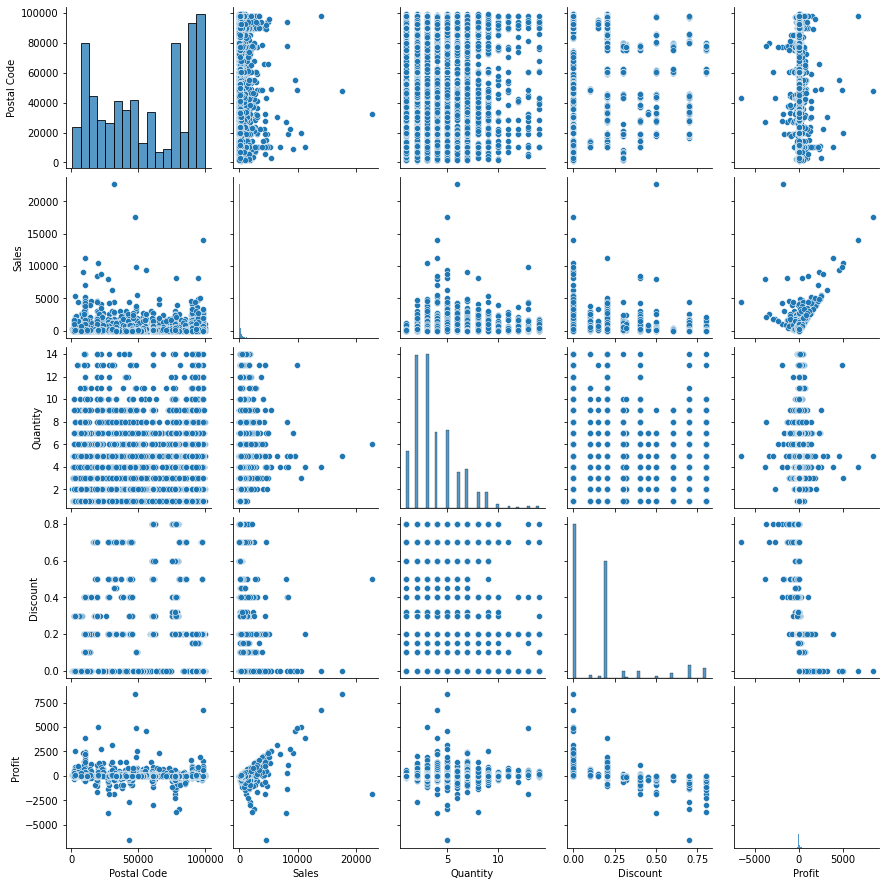

In [11]:
sns.pairplot(data);
plt.show()

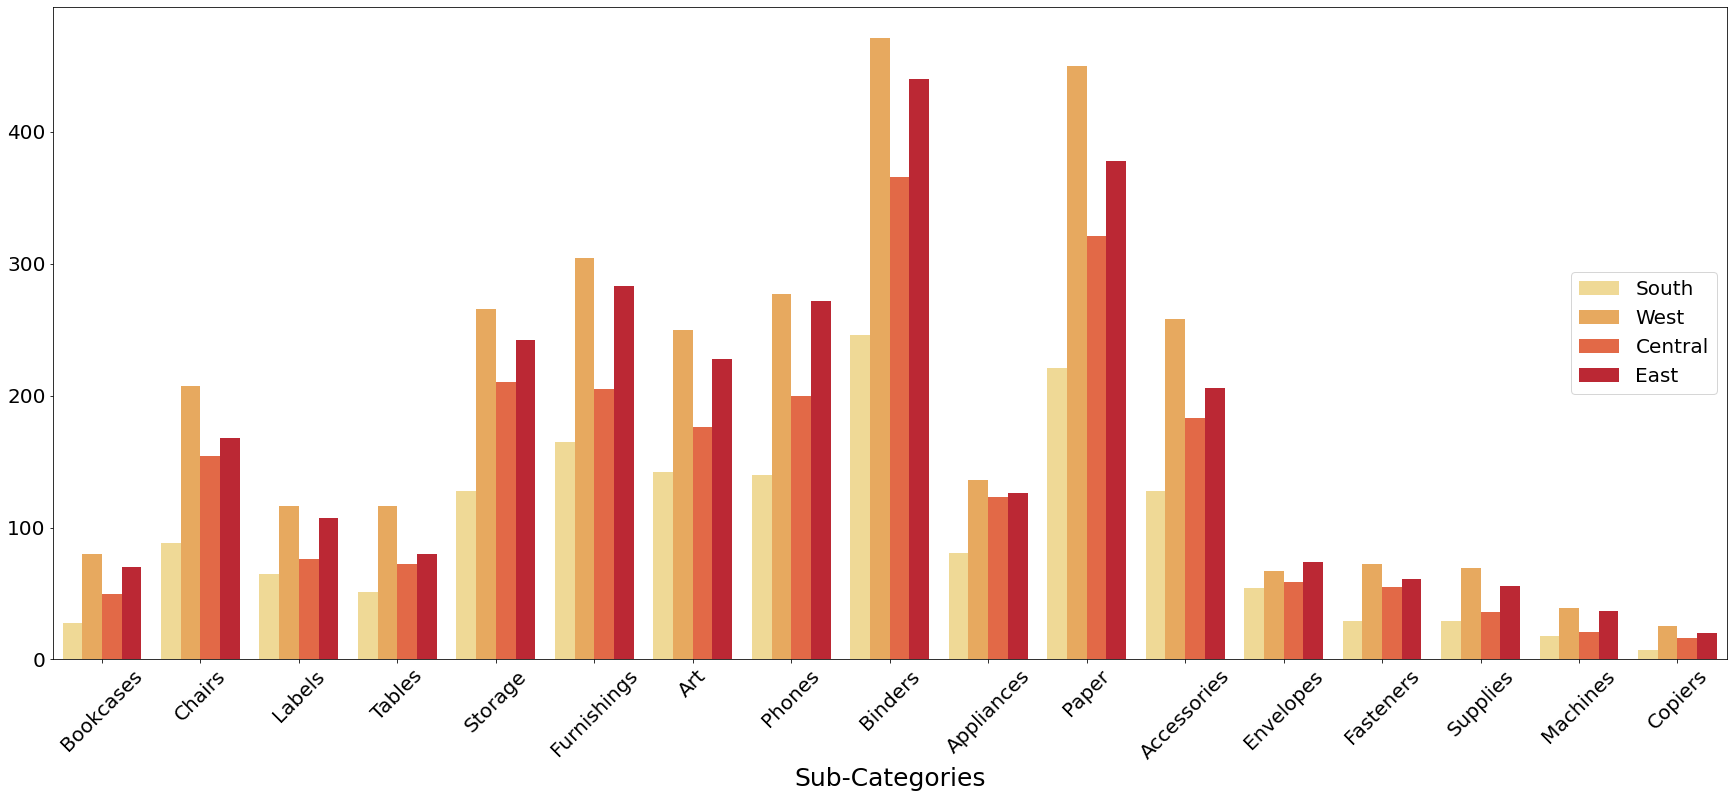

In [20]:
plt.figure(figsize = (30, 12))
sns.countplot(x = 'Sub-Category', hue = 'Region', data = data, palette = 'YlOrRd')
plt.xticks(rotation = 45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Sub-Categories', fontsize = 25)
plt.ylabel('', fontsize = 20)
plt.legend(loc = 5, fontsize = 20);

#classifying the categories according to region

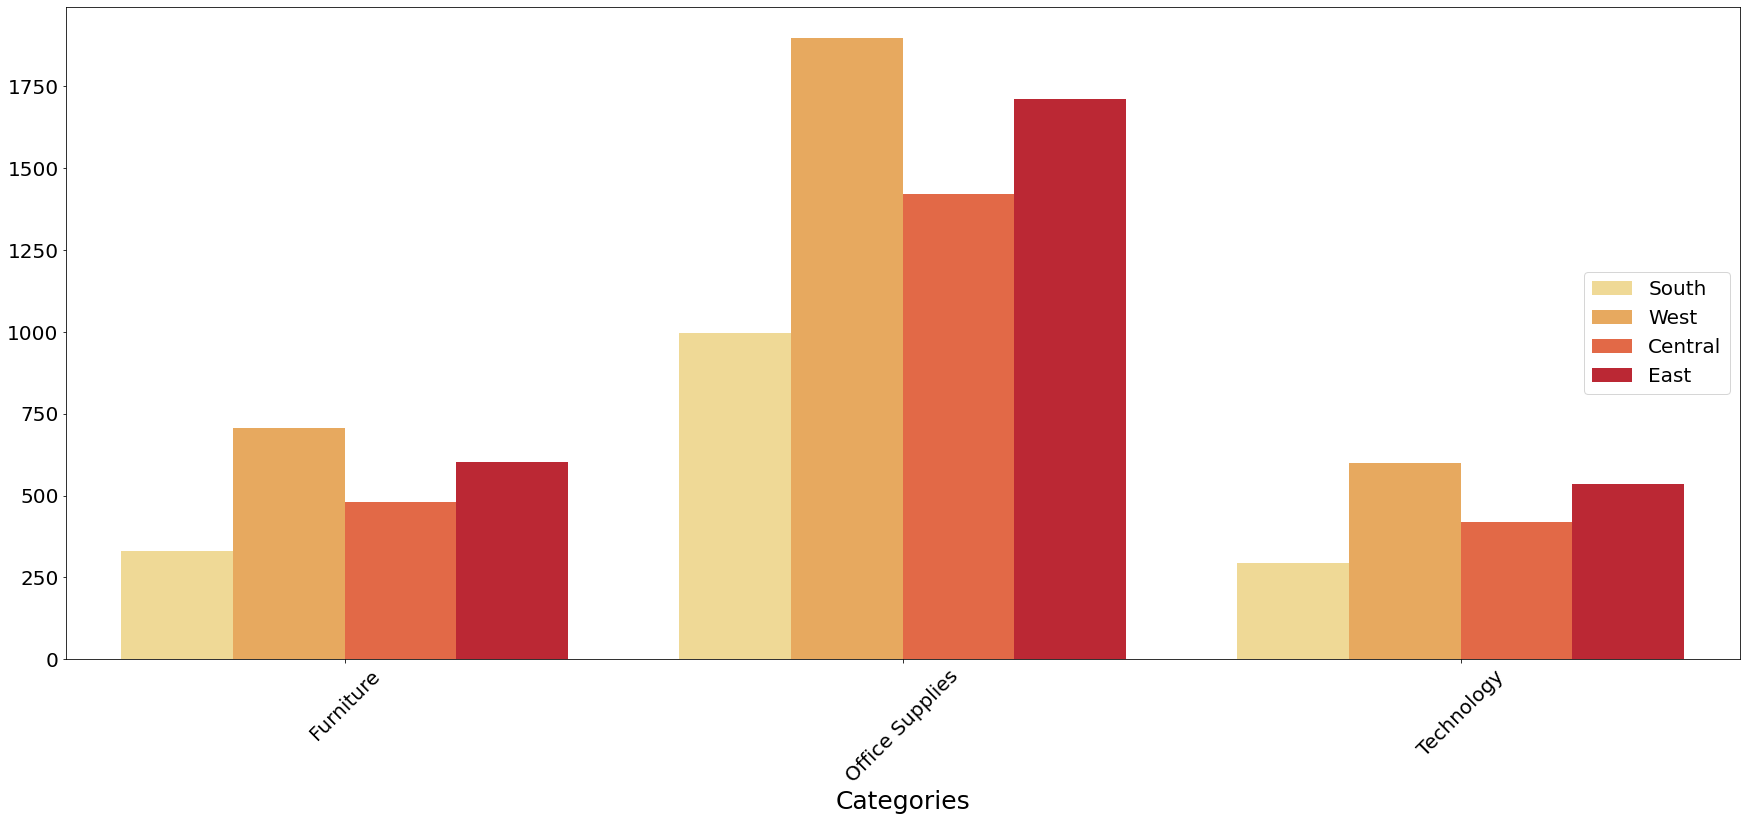

In [21]:
plt.figure(figsize = (30, 12))
sns.countplot(x = 'Category', hue = 'Region', data = data, palette = 'YlOrRd')
plt.xticks(rotation = 45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Categories', fontsize = 25)
plt.ylabel('', fontsize = 20)
plt.legend(loc = 5, fontsize = 20);

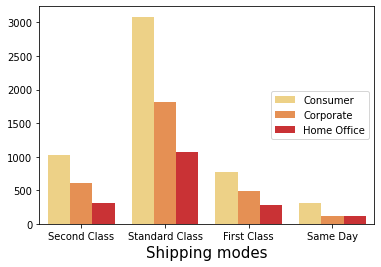

In [23]:
sns.countplot(x = 'Ship Mode', hue = 'Segment', data = data, palette = 'YlOrRd')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Shipping modes', fontsize = 15)
plt.ylabel('', fontsize = 10)
plt.legend(loc = 5, fontsize = 10);

#Quantities ordered vs state


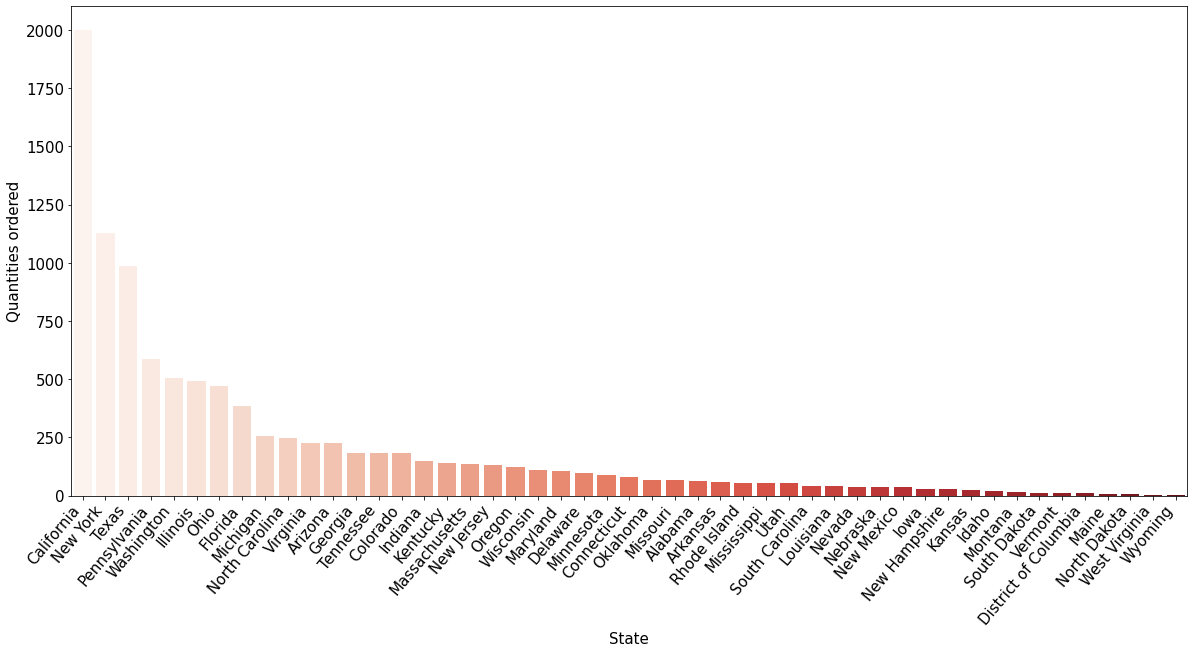

In [45]:
plt.figure(figsize = (20, 9))
sns.countplot(x = data['State'],palette = 'Reds', order = (data['State'].value_counts().head(50)).index)
plt.xticks(rotation = 50, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Quantities ordered', fontsize = 15);

#To Get top 10 states


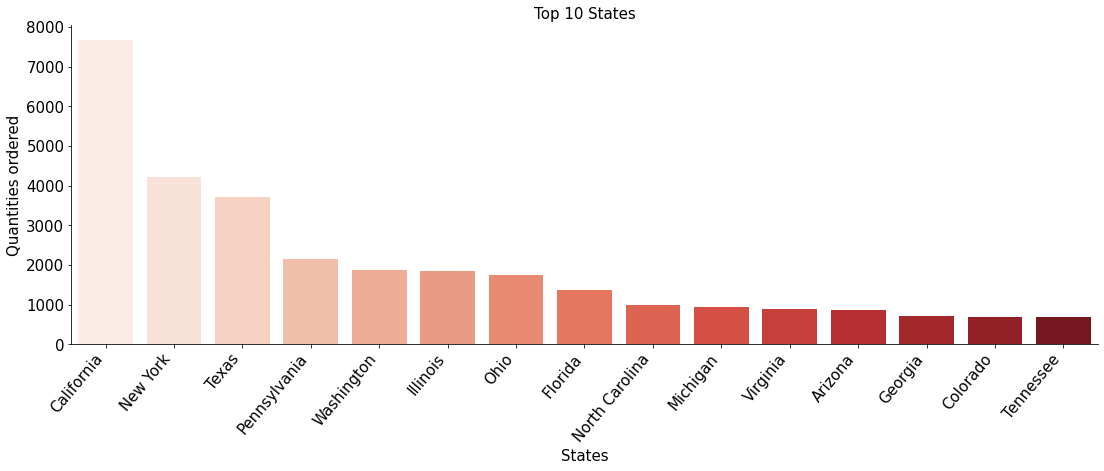

In [17]:
top_10 = data.groupby('State')['Quantity'].sum().reset_index().sort_values(by = 'Quantity', ascending = False)
sns.catplot(x = 'State', y = 'Quantity', data = top_10.head(15), kind = 'bar', palette = 'Reds', aspect = 3)
plt.title('Top 10 States', fontsize = 15)
plt.xticks(rotation = 50, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Quantities ordered', fontsize = 15);

#Quantities ordered vs city

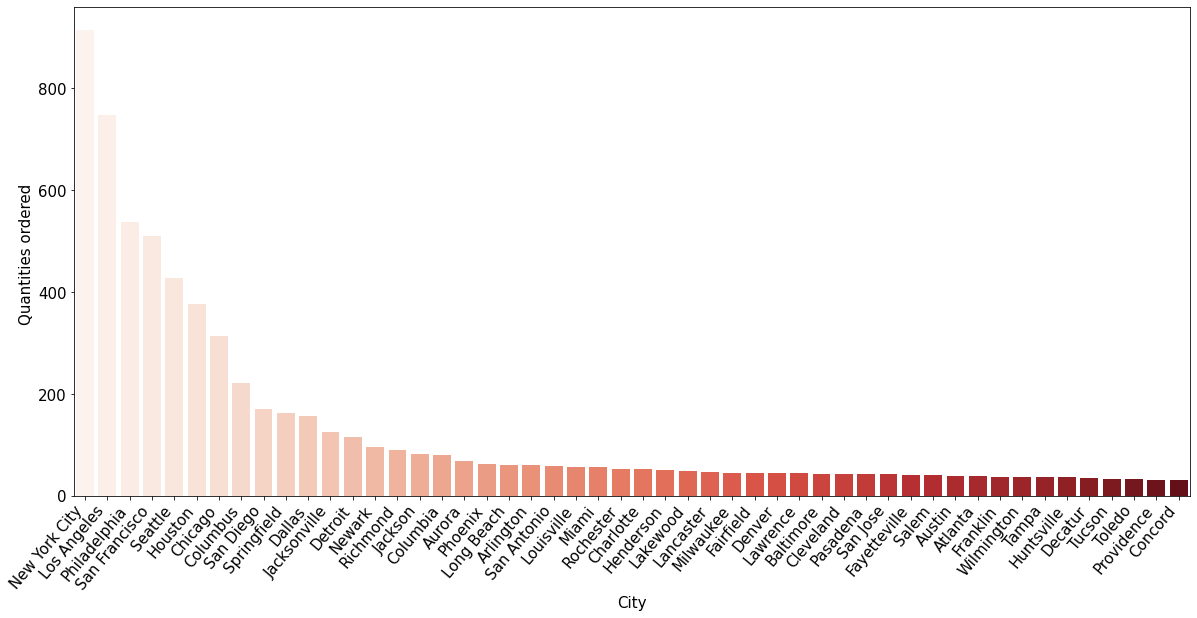

In [18]:
plt.figure(figsize = (20, 9))
sns.countplot(x = data['City'],palette = 'Reds', order = (data['City'].value_counts().head(50)).index)
plt.xticks(rotation = 50, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('City', fontsize = 15)
plt.ylabel('Quantities ordered ', fontsize = 15);

#To Get top 10 Cities


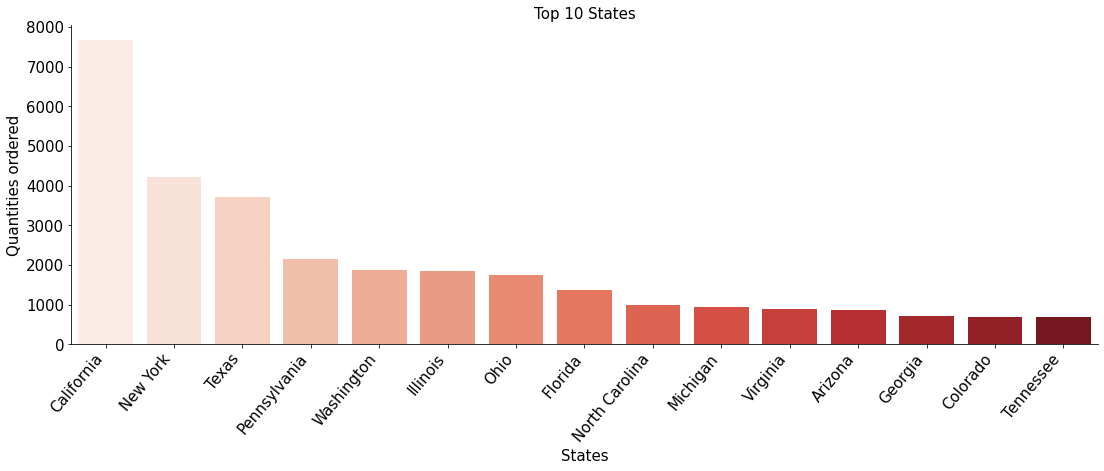

In [19]:
top_10 = data.groupby('State')['Quantity'].sum().reset_index().sort_values(by = 'Quantity', ascending = False)
sns.catplot(x = 'State', y = 'Quantity', data = top_10.head(15), kind = 'bar', palette = 'Reds', aspect = 3)
plt.title('Top 10 States', fontsize = 15)
plt.xticks(rotation = 50, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Quantities ordered', fontsize = 15);

#average profit divided by region

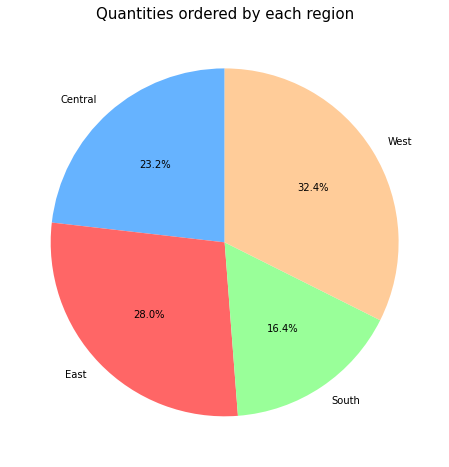

In [24]:
Quantity_vs_region = data.groupby('Region')['Quantity'].sum().reset_index()
plt.figure(figsize = (12, 8))
plt.pie(Quantity_vs_region['Quantity'], labels = Quantity_vs_region['Region'].unique(), autopct='%1.1f%%', startangle = 90,
       colors = ['#66b3ff', '#ff6666', '#99ff99', '#ffcc99'])

plt.title('Quantities ordered by each region', fontsize = 15);

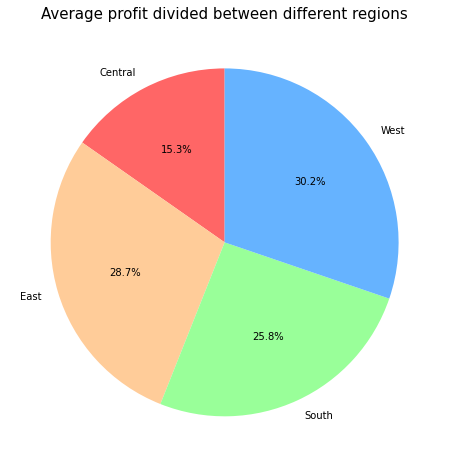

In [25]:
Profit_vs_region = data.groupby('Region')['Profit'].mean().reset_index()
plt.figure(figsize = (12, 8))
plt.pie(Profit_vs_region ['Profit'], labels = Profit_vs_region ['Region'].unique(), autopct = '%.1f%%', startangle = 90,
       colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff'])
plt.title('Average profit divided between different regions', fontsize = 15);
